## Generate text version Vietnamese.

In [45]:
# Load the dataframe 
import pandas as pd 
df = pd.read_csv('../data/Restaurant_Reviews.tsv', sep='\t')
df = df.rename(columns={'Review': 'text'})
df 

,text,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [46]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords

def clean_text(text):
  
    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = re.sub('[^a-zA-Z0-9\s]+', '', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

# Apply the clean_text function to all text in the 'text' column
df['text'] = df['text'].apply(clean_text)

# Show the updated dataframe
df.head()

[nltk_data] Downloading package stopwords to /Users/ngocp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


In [47]:
from nltk.stem import SnowballStemmer

# initialize SnowballStemmer 
stemmer = SnowballStemmer('english')

def stem_text(text):
    # Tokenize the input text into individual words
    tokens = nltk.word_tokenize(text)
    
    # Stem each token using the SnowballStemmer
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the stemmed tokens back into a single string
    return ' '.join(stemmed_tokens)

In [48]:
# apply stemming to the 'text' column in your DataFrame
# df['text'] = df['text'].apply(stem_text)
# Show the updated dataframe
# df.head()

In [49]:
import re

contents = df['text'].values.tolist()
def santilize(x):
    t = x.split(' ')
    new_list = [item for item in t if item is not None]
    return new_list
content_tokens = list(map(santilize, contents))
print('content_tokens', content_tokens[0])


content_tokens ['wow', 'loved', 'place']


In [50]:
from transformers import AutoTokenizer, AutoModelWithLMHead
modelMaskedLM = AutoModelWithLMHead.from_pretrained('gpt2')
tokenizerVI = AutoTokenizer.from_pretrained('gpt2')

/Users/ngocp/.pyenv/versions/3.10.3/lib/python3.10/site-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
loading configuration file config.json from cache at /Users/ngocp/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_a

In [51]:
def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

sentence_tokens = flatten_list(content_tokens)
print('sentence_tokens', set(sentence_tokens[0:30]))
new_tokens = set(sentence_tokens) - set(tokenizerVI.get_vocab().keys())
print('length before add:', len(tokenizerVI.vocab))
tokenizerVI.add_tokens(list(new_tokens))
print('length after add:', len(tokenizerVI.vocab))
modelMaskedLM.resize_token_embeddings(len(tokenizerVI)+1)

sentence_tokens {'fresh', 'damn', 'honeslty', 'texture', 'tasty', 'didnt', 'pho', 'recommendation', 'wow', 'rick', 'selection', 'stopped', 'nasty', 'want', 'great', 'place', 'taste', 'holiday', 'getting', 'menu', 'loved', 'crust', 'angry', 'may', 'late', 'good', 'prices', 'bank', 'steve'}
length before add: 50257
length after add: 51482


Embedding(51483, 768)

[('forty', 51257), ('bussell', 50771), ('boba', 50611), ('choux', 50483), ('welcome', 51317), ('greatest', 51067), ('caballeros', 50868), ('sushi', 50925), ('couple', 50819), ('lemon', 50639), ('pricey', 50881), ('bigger', 51128), ('editing', 50386), ('performed', 51021), ('overcooked', 51338), ('tasty', 50426), ('luke', 50460), ('disgust', 51305), ('serves', 50410), ('dude', 51178), ('solidify', 50280), ('negligent', 50595), ('cramming', 50612), ('dispenser', 50967), ('unfortunately', 50779), ('dreamed', 50517), ('hasnt', 50343), ('potato', 51191), ('publicly', 50753), ('boring', 50822), ('quantity', 51149), ('tragedy', 50566), ('extraordinary', 50721), ('authentic', 50974), ('corporation', 50428), ('decision', 50493), ('downside', 50734), ('anytime', 50434), ('twice', 50429), ('expect', 51411), ('edinburgh', 50553), ('capers', 51055), ('comfortable', 50509), ('mood', 51225), ('omg', 51226), ('returned', 50529), ('profiterole', 50776), ('crema', 50521), ('suggestions', 51475), ('wines

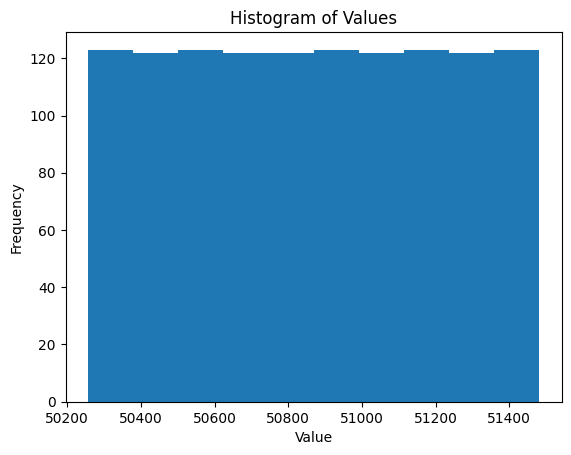

The range of values is 1224.0.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

vocabAdded = tokenizerVI.get_added_vocab()
print(list(vocabAdded.items()))
df = pd.DataFrame(list(vocabAdded.items()), columns=['key', 'value'])

print(df)

In [53]:
# Open the file in write mode
with open("../data/news_output.txt", "w") as file:
    # Truncate the file to the current position of the file pointer
    file.truncate()

print(content_tokens[:20])
with open("../data/news_output.txt", "w") as file:
    for t in content_tokens[:2]:
        file.write(' '.join(t) + "\n")

tokenizerVI.add_special_tokens({'pad_token': '[PAD]'})

Assigning [PAD] to the pad_token key of the tokenizer


[['wow', 'loved', 'place'], ['crust', 'good'], ['tasty', 'texture', 'nasty'], ['stopped', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommendation', 'loved'], ['selection', 'menu', 'great', 'prices'], ['getting', 'angry', 'want', 'damn', 'pho'], ['honeslty', 'didnt', 'taste', 'fresh'], ['potatoes', 'like', 'rubber', 'could', 'tell', 'made', 'ahead', 'time', 'kept', 'warmer'], ['fries', 'great'], ['great', 'touch'], ['service', 'prompt'], ['would', 'go', 'back'], ['cashier', 'care', 'ever', 'say', 'still', 'ended', 'wayyy', 'overpriced'], ['tried', 'cape', 'cod', 'ravoli', 'chicken', 'cranberrymmmm'], ['disgusted', 'pretty', 'sure', 'human', 'hair'], ['shocked', 'signs', 'indicate', 'cash'], ['highly', 'recommended'], ['waitress', 'little', 'slow', 'service'], ['place', 'worth', 'time', 'let', 'alone', 'vegas'], ['like']]


1

In [54]:
max_seq_length = 512
encoded_texts = [tokenizerVI.encode(text, truncation=True, max_length=max_seq_length) for text in contents]
print(encoded_texts[:2])

[[42773, 220, 51078, 1295], [50466, 922]]


In [59]:
from transformers import LineByLineTextDataset, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# training_data = LineByLineTextDataset(
#     tokenizer=tokenizerVI,
#     file_path='../data/news_output.txt',
#     block_size=1024,
# )

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizerVI, mlm=False, mlm_probability=0.15
)

training_args = TrainingArguments(
    output_dir="./results-text",
    overwrite_output_dir=True,
    num_train_epochs=12,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=8,
    warmup_steps=1000,
    logging_steps=500,
)

trainer = Trainer(
    model=modelMaskedLM,
    args=training_args,
    train_dataset=encoded_texts,
    data_collator=data_collator
)

trainer.train()


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/Users/ngocp/.pyenv/versions/3.10.3/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1000
  Num Epochs = 12
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 756
  Number of trainable parameters = 125381376


  0%|          | 0/756 [00:00<?, ?it/s]

Saving model checkpoint to ./results-text/checkpoint-500
Configuration saved in ./results-text/checkpoint-500/config.json
Configuration saved in ./results-text/checkpoint-500/generation_config.json


{'loss': 14.4087, 'learning_rate': 2.5e-05, 'epoch': 7.94}


Model weights saved in ./results-text/checkpoint-500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




{'train_runtime': 648.6765, 'train_samples_per_second': 18.499, 'train_steps_per_second': 1.165, 'train_loss': 11.13747167839575, 'epoch': 12.0}


TrainOutput(global_step=756, training_loss=11.13747167839575, metrics={'train_runtime': 648.6765, 'train_samples_per_second': 18.499, 'train_steps_per_second': 1.165, 'train_loss': 11.13747167839575, 'epoch': 12.0})

In [60]:
trainer.save_model()

Saving model checkpoint to ./results-text
Configuration saved in ./results-text/config.json
Configuration saved in ./results-text/generation_config.json
Model weights saved in ./results-text/pytorch_model.bin


In [61]:
from transformers import pipeline

chef = pipeline('text-generation', model='./results-text', tokenizer=tokenizerVI)

result = chef('Loved this')
print('result', result)

loading configuration file ./results-text/config.json
Model config GPT2Config {
  "_name_or_path": "./results-text",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "torch_dtype": "float32",
  "transformers_version": "4.26.1",
  "use_cache": true,
  "vocab_size": 51483
}

load

result [{'generated_text': 'Loved this place serve great food restaurant definitely bland staff sandwich worst breakfast management vegas place food court place serve management service dont management amazing selection staff wait staff overpriced management eaten management staff food options management'}]


In [63]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

text = """
write comment about "Loved this", for restaurant
"""
input_ids = tokenizerVI.encode(text, return_tensors='pt')
print('input_ids',input_ids)
max_length = 100

sample_outputs = modelMaskedLM.generate(input_ids,pad_token_id=tokenizerVI.eos_token_id,
                                    bos_token_id=tokenizerVI.bos_token_id,
                                    eos_token_id=tokenizerVI.eos_token_id,
                                   do_sample=True,
                                   max_length=max_length,
                                   min_length=max_length,
                                   top_k=40,
                                   num_beams=5,
                                   early_stopping=True,
                                   no_repeat_ngram_size=2,
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizerVI.decode(sample_output.tolist())))
    print('\n---')


Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256,
  "transformers_version": "4.26.1"
}



input_ids tensor([[  198, 13564,  2912,   546,   366,    43,  2668,   428,  1600,   329,
           220, 50935,   198]])
>> Generated text 1


write comment about "Loved this", for restaurant
greatest bland ive ever amazing steak definitely vegas delicious disappointed prices salad taste tasted experience spicy wont cant awesome serve didnt expect sushi came dont chicken minutes recommended flavor perfectly buffet dish pasta wasnt overpriced servers tasteless dessert breakfast tasty seated sauce sandwich dirt 

---
>> Generated text 2


write comment about "Loved this", for restaurant
greatest delicious prices tender experience minutes bland disappointed expect wasnt ive didnt amazing serve excellent cant salad awesome steak sauce taste pizza rude buffet vegas beef came sushi dish incredible meals flavor attentive dont tasted spicy fries tasty sandwich impressed wouldnt fantastic iced terrible

---
>> Generated text 3


write comment about "Loved this", for restaurant
greatest prices f